In [1]:
%matplotlib notebook
%matplotlib notebook

from qncmbe.refl_fit.refl_fit import *
import numpy as np

# Set up materials

In [2]:
GaAs = Material('GaAs')
AlAs = Material('AlAs')

# Refractive indices fitted to XRD
GaAs.set_N_at_wavelength('950.3', 3.7575 - 1j*0.1070)
GaAs.set_N_at_wavelength('469.5', 4.667 - 1j*1.594)

AlAs.set_N_at_wavelength('950.3', 3.047 - 1j*0.00)
AlAs.set_N_at_wavelength('469.5', 3.7341 - 1j*0.1022)

# Get raw data

<IPython.core.display.Javascript object>


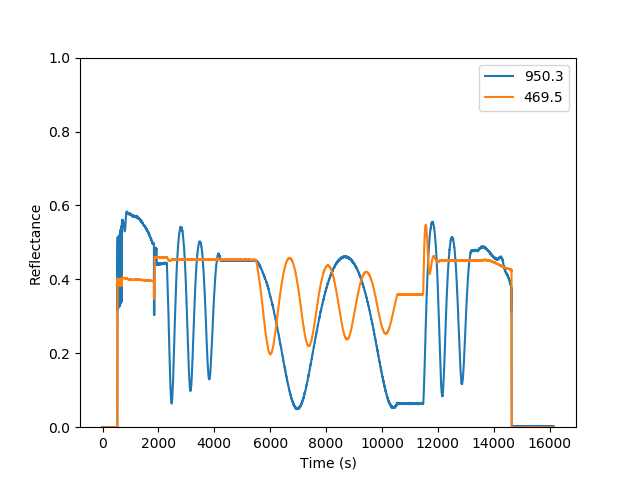

In [3]:
#filepath = r"X:\ZW-XP1\G0641\G0641_IS4K Refl.txt"
filepath = "G0641_IS4K Refl.txt"

raw_data = np.genfromtxt(filepath, skip_header = 3, usecols = (0,1,2))

t = raw_data[:,0]*3600*24
R = {'950.3': raw_data[:,1], '469.5': raw_data[:,2]}

t -= t[0]

fig, ax = plt.subplots()

for wvln in R:
    ax.plot(t, R[wvln], label = wvln)

ax.set_xlabel('Time (s)')
ax.set_ylabel('Reflectance')
ax.set_ylim([0,1])

ax.legend()

# Set up structure

In [4]:
struct = Structure(substrate = GaAs)

struct.set_refl_data(t, R)
struct.use_angstroms_for_structure() #Use angstroms for structure but nm for wavelength

# Add layers: name, material, thickness, layer growth time, start time in the reflectance data
struct.add_layer('GaAs', GaAs, 3793.6*0.90, 2107.6*0.90, 2303)
struct.add_layer('AlAs', AlAs, 0.4513*5183*0.95, 5183*0.95, 5499)
struct.add_layer('GaAs2', GaAs, 1500*1.8, 1500, 11477)

# Fits with n,k fixed

<IPython.core.display.Javascript object>


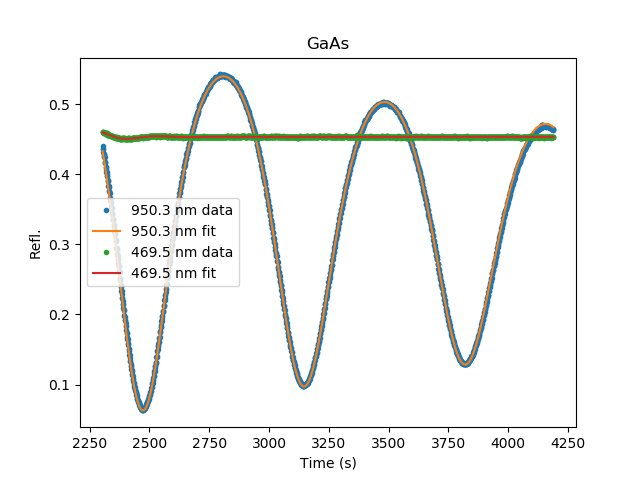

------------------------------
Layer: GaAs

Wavelength = 950.3 nm
N = 3.75750-0.10700j (Fixed)
Ns = 2.68006-2.61943j (Initial guess: 3.75750-0.10700j)
G = 1.87659 Å/s (4.25735 % away from initial guess of 1.79996 Å/s)
s = 0.91203 (Initial guess: 1.00000)

Wavelength = 469.5 nm
N = 4.66700-1.59400j (Fixed)
Ns = 4.71063-1.67276j (Initial guess: 4.66700-1.59400j)
G = 1.94346 Å/s (7.97200 % away from initial guess of 1.79996 Å/s)
s = 0.98263 (Initial guess: 1.00000)
------------------------------



<IPython.core.display.Javascript object>


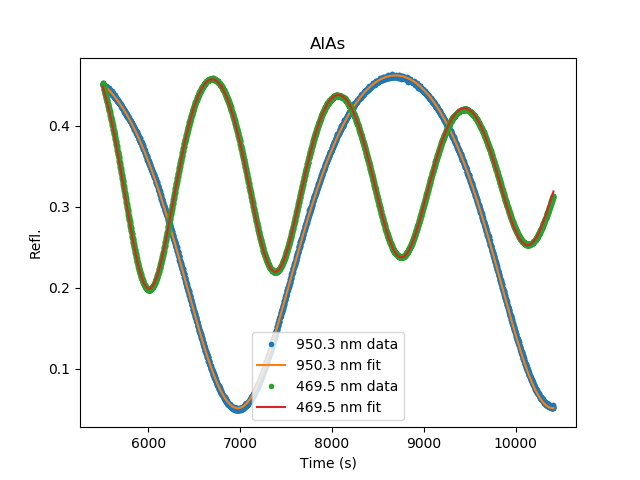

------------------------------
Layer: AlAs

Wavelength = 950.3 nm
N = 3.04700+0.00000j (Fixed)
Ns = 5.11500-1.49626j (Initial guess: 3.75750-0.10700j)
G = 0.45426 Å/s (0.65664 % away from initial guess of 0.45130 Å/s)
s = 0.93245 (Initial guess: 1.00000)

Wavelength = 469.5 nm
N = 3.73410-0.10220j (Fixed)
Ns = 4.57674-1.45661j (Initial guess: 4.66700-1.59400j)
G = 0.45746 Å/s (1.36590 % away from initial guess of 0.45130 Å/s)
s = 0.99851 (Initial guess: 1.00000)
------------------------------



<IPython.core.display.Javascript object>


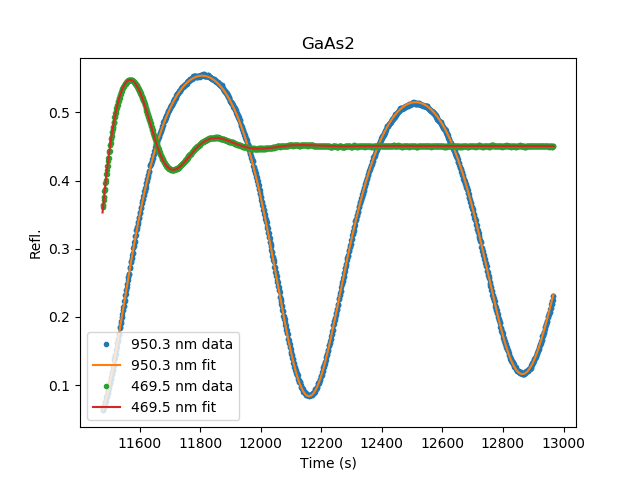

------------------------------
Layer: GaAs2

Wavelength = 950.3 nm
N = 3.75750-0.10700j (Fixed)
Ns = 1.63931+0.28024j (Initial guess: 3.04700+0.00000j)
G = 1.79423 Å/s (-0.32054 % away from initial guess of 1.80000 Å/s)
s = 0.90867 (Initial guess: 1.00000)

Wavelength = 469.5 nm
N = 4.66700-1.59400j (Fixed)
Ns = 3.87945+0.70138j (Initial guess: 3.73410-0.10220j)
G = 1.77808 Å/s (-1.21764 % away from initial guess of 1.80000 Å/s)
s = 0.97696 (Initial guess: 1.00000)
------------------------------



In [5]:
struct.set_fit_type('fix nk')

struct.calc_refl_fits()

struct.display_fit_results()

In [6]:
struct.print_growth_rate_summary()

------------------------------
Layer: GaAs
Wavelength = 950.3 nm
G = 1.87659 Å/s (4.25735 % away from initial guess of 1.79996 Å/s)
Wavelength = 469.5 nm
G = 1.94346 Å/s (7.97200 % away from initial guess of 1.79996 Å/s)
------------------------------

------------------------------
Layer: AlAs
Wavelength = 950.3 nm
G = 0.45426 Å/s (0.65664 % away from initial guess of 0.45130 Å/s)
Wavelength = 469.5 nm
G = 0.45746 Å/s (1.36590 % away from initial guess of 0.45130 Å/s)
------------------------------

------------------------------
Layer: GaAs2
Wavelength = 950.3 nm
G = 1.79423 Å/s (-0.32054 % away from initial guess of 1.80000 Å/s)
Wavelength = 469.5 nm
G = 1.77808 Å/s (-1.21764 % away from initial guess of 1.80000 Å/s)
------------------------------

